In [1]:
# 📘 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# 📘 Step 2: Load the dataset
df = pd.read_csv("emails.csv")

print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully
Shape: (5172, 3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# 📘 Step 3: Basic information about dataset
print("Columns:", df.columns.tolist())
df.info()
print("\nMissing values:\n", df.isnull().sum())


Columns: ['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara', 'about', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'now', 'their', 'file', 'some', 'email', 'just', 'also', 'call', 'change', 'other', 'here', 'like', 'b', 'flow', 'net', 

Target column detected: spam
spam
0    5104
1      57
2       5
4       3
5       2
3       1
Name: count, dtype: int64


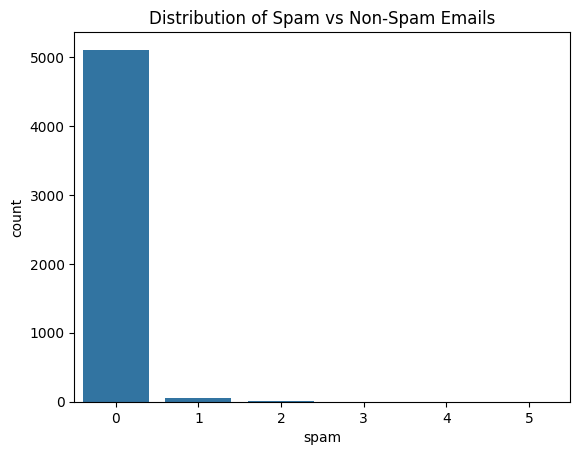

In [7]:
# 📘 Step 4: Check target class distribution
# Usually target column is 'spam' or 'label' (0 = Not Spam, 1 = Spam)
target_col = None
for c in df.columns:
    if any(k in c.lower() for k in ['spam','label','target','class']):
        target_col = c
        break

if not target_col:
    raise ValueError("⚠️ Could not find a spam/label column. Please check dataset columns.")

print("Target column detected:", target_col)
print(df[target_col].value_counts())
sns.countplot(x=df[target_col])
plt.title("Distribution of Spam vs Non-Spam Emails")
plt.show()


In [9]:
# 📘 Step 5: Text Preprocessing (convert to lowercase, remove nulls)
text_col = None
for c in df.columns:
    if df[c].dtype == object:
        text_col = c
        break

if not text_col:
    raise ValueError("⚠️ No text column found. Check dataset structure.")

df = df[[text_col, target_col]].dropna()
df[text_col] = df[text_col].astype(str).str.lower()

print(f"Using text column: '{text_col}' and target column: '{target_col}'")
df.head()


Using text column: 'Email No.' and target column: 'spam'


,Email No.,spam
0,email 1,0
1,email 2,0
2,email 3,0
3,email 4,0
4,email 5,0


In [11]:
# 📘 Step 6: Convert text to numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df[text_col])
y = df[target_col]

print("✅ Text successfully converted into numeric TF-IDF features")
print("TF-IDF Matrix shape:", X.shape)


✅ Text successfully converted into numeric TF-IDF features
TF-IDF Matrix shape: (5172, 3000)


In [15]:
# 📘 Step 7 (Fixed): Split into training and testing data safely

# Check unique class counts first
print("Class distribution before splitting:")
print(y.value_counts())

# Only stratify if both classes have >=2 samples
if y.value_counts().min() >= 2:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
else:
    print("⚠️ Warning: One class has only 1 sample — skipping stratify.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print("Training size:", X_train.shape, "Testing size:", X_test.shape)


Class distribution before splitting:
spam
0    5104
1      57
2       5
4       3
5       2
3       1
Name: count, dtype: int64
⚠️ Warning: One class has only 1 sample — skipping stratify.
Training size: (4137, 3000) Testing size: (1035, 3000)


In [17]:
# 📘 Step 8: Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("📊 KNN Accuracy:", round(acc_knn, 4))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))


📊 KNN Accuracy: 0.9894

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1024
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1035
   macro avg       0.49      0.50      0.50      1035
weighted avg       0.98      0.99      0.98      1035



In [19]:
# 📘 Step 9: Implement Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("📈 SVM Accuracy:", round(acc_svm, 4))
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))


📈 SVM Accuracy: 0.9894

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1024
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1035
   macro avg       0.49      0.50      0.50      1035
weighted avg       0.98      0.99      0.98      1035



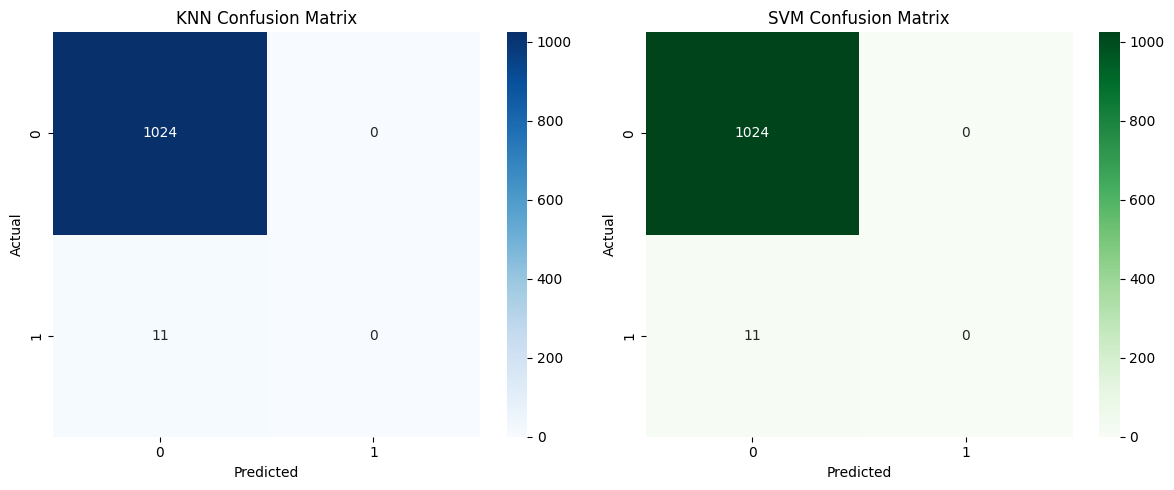

In [21]:
# 📘 Step 10: Confusion Matrices for both models
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


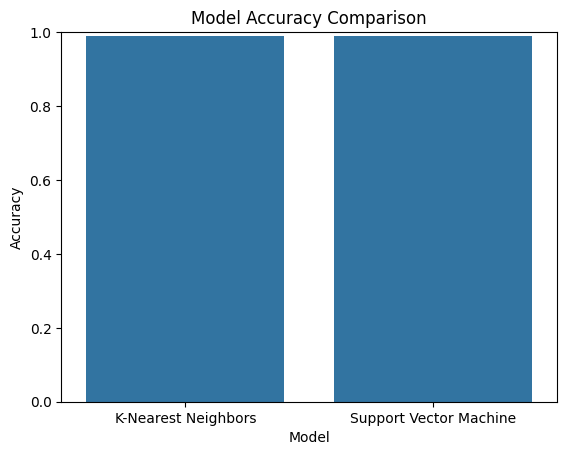


Summary of model performance:
                    Model  Accuracy
0     K-Nearest Neighbors  0.989372
1  Support Vector Machine  0.989372


In [23]:
# 📘 Step 11: Compare Model Performance
results = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine'],
    'Accuracy': [acc_knn, acc_svm]
})
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

print("\nSummary of model performance:")
print(results)
